In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
comm_sale_report = pd.read_csv('Amazon Sale Report.csv')
comm_sale_report.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
comm_sale_report.shape

(128975, 24)

In [4]:
comm_sale_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
comm_sale_report.duplicated().sum()

0

In [6]:
comm_sale_report.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [7]:
comm_sale_report.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [8]:
comm_sale_report = comm_sale_report.drop(columns= ['index','currency','ship-country','Unnamed: 22'])

In [9]:
comm_sale_report.head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False,NaN


In [10]:
comm_sale_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  Amount              121180 non-null  float64
 14  ship-city           128942 non-null  object 
 15  ship-state          128942 non-nul

In [11]:
comm_sale_report['Courier Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [12]:
comm_sale_report['Amount'].unique()

array([ 647.62,  406.  ,  329.  , ...,  708.58, 1244.  ,  639.  ])

In [13]:
comm_sale_report['Amount'].unique()

array([ 647.62,  406.  ,  329.  , ...,  708.58, 1244.  ,  639.  ])

In [14]:
comm_sale_report['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [15]:
comm_sale_report['promotion-ids'].nunique()

5787

In [16]:
comm_sale_report['Courier Status'] = comm_sale_report['Courier Status'].fillna(comm_sale_report['Courier Status'].mode()[0])
comm_sale_report['promotion-ids'] = comm_sale_report['promotion-ids'].fillna(comm_sale_report['promotion-ids'].mode()[0])
comm_sale_report['fulfilled-by']=comm_sale_report['fulfilled-by'].fillna('unknown')
comm_sale_report.fillna(comm_sale_report['Amount'].mean(), inplace=True)
#comm_sale_report.fillna(comm_sale_report['Courier Status'].mode()[11], inplace=True)
#comm_sale_report.fillna(comm_sale_report['Amount'].mean(), inplace=True)
#comm_sale_report.fillna(comm_sale_report['promotion-ids'].mode(), inplace=True)
#comm_sale_report['fulfilled-by']=comm_sale_report['fulfilled-by'].fillna('unknown')

In [17]:
comm_sale_report.sample(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B,fulfilled-by
1223,407-9889269-9425948,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,L,B09811Y7WM,Cancelled,0,648.561465,SATHUPALLY,TELANGANA,507303.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,unknown
70383,171-1354984-5581152,05-14-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3675,JNE3675-TU-XXXL,Top,3XL,B0943DKGXG,Shipped,1,574.000000,KALYAN,MAHARASHTRA,421301.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
64787,406-3345731-6205902,05-19-22,Shipped,Amazon,Amazon.in,Expedited,JNE3687,JNE3687-TU-L,Top,L,B098711MQX,Shipped,1,545.000000,GHAZIABAD,UTTAR PRADESH,201007.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,unknown
2408,407-6374870-3377928,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0118,J0118-TP-XXXL,Top,3XL,B08N43MK22,Shipped,1,518.000000,MUMBAI,MAHARASHTRA,400023.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,unknown
85760,406-7991930-9150712,05-03-22,Shipped,Amazon,Amazon.in,Expedited,SET230,SET230-KR-PP-S,Set,S,B08MXSQPFH,Shipped,1,799.000000,HYDERABAD,TELANGANA,500075.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,unknown


In [18]:
comm_sale_report.isna().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64

In [19]:
# most frequently used channel

comm_sale_report['Sales Channel '].value_counts()



Amazon.in     128851
Non-Amazon       124
Name: Sales Channel , dtype: int64

Text(0.5, 1.0, ' most frequently used channel')

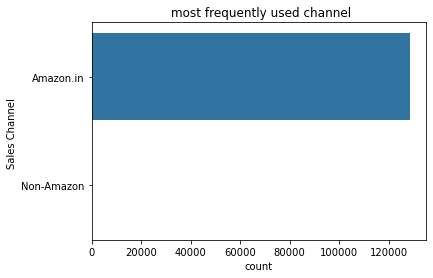

In [20]:
sns.countplot(y = 'Sales Channel ', data = comm_sale_report)
plt.title(" most frequently used channel")

In [21]:
comm_sale_report['Courier Status'].value_counts()

Shipped      116359
Unshipped      6681
Cancelled      5935
Name: Courier Status, dtype: int64

Text(0.5, 1.0, 'Customer count by Status')

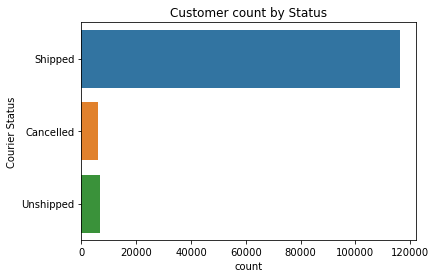

In [22]:
sns.countplot(y = 'Courier Status', data = comm_sale_report)
plt.title("Customer count by Status")

In [23]:
# mostly shopping store used by customer 
comm_sale_report['Fulfilment'].value_counts()

Amazon      89698
Merchant    39277
Name: Fulfilment, dtype: int64

Text(0.5, 1.0, ' mostly shopping store used by customer')

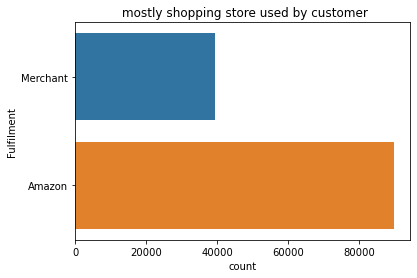

In [24]:
sns.countplot(y = 'Fulfilment', data = comm_sale_report)
plt.title(" mostly shopping store used by customer")

In [25]:
# product delivery service
comm_sale_report['ship-service-level'].value_counts()


Expedited    88615
Standard     40360
Name: ship-service-level, dtype: int64

Text(0.5, 1.0, ' product delivery service')

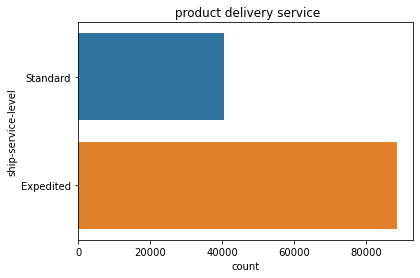

In [26]:
sns.countplot(y = 'ship-service-level', data = comm_sale_report)
plt.title(" product delivery service")

<AxesSubplot:xlabel='Size', ylabel='Amount'>

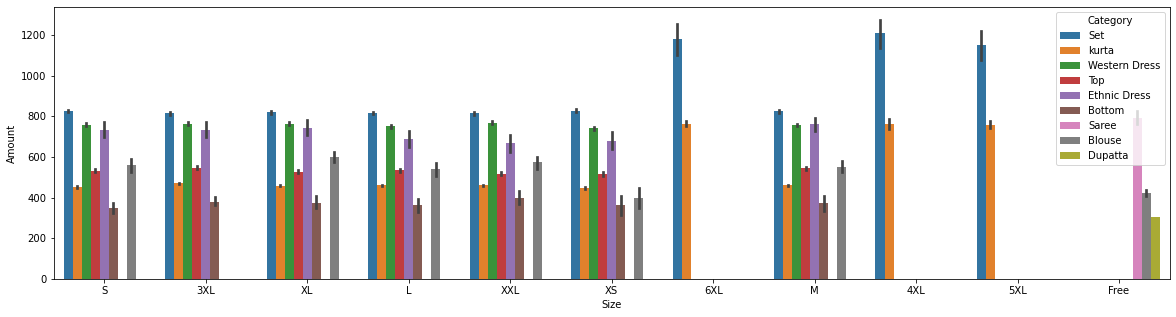

In [27]:
# it is observed that
# 1. most trending dress is category set with amount range between 800-1200 INR in all sizes
# 2. category western dress and ethinic dress are next most demanding, amount range 600-800 INR has been spent in all sizes
# 3. rest of the dresses are below 600 INR

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(comm_sale_report['Size'],comm_sale_report['Amount'], hue=comm_sale_report['Category'])

In [28]:
Category_by_Sales = (round(comm_sale_report.groupby(by='Category').sum()[['Amount']],2))
Category_by_Sales

,Amount
Category,
Blouse,487593.45
Bottom,163639.21
Dupatta,915.00
Ethnic Dress,834022.72
Saree,129770.81
Set,41306760.30
Top,5644184.89
Western Dress,11732327.62
kurta,23349000.93


In [29]:
#converting and extracting of year,month,day from date field

comm_sale_report['Date'] = pd.to_datetime(comm_sale_report['Date'])
comm_sale_report['year'] = comm_sale_report['Date'].dt.year
comm_sale_report['month'] = comm_sale_report['Date'].dt.month
comm_sale_report['day'] = comm_sale_report['Date'].dt.day

In [30]:
comm_sale_report.head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B,fulfilled-by,year,month,day
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,2022,4,30
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,2022,4,30
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True,unknown,2022,4,30
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,2022,4,30
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,unknown,2022,4,30
